In [13]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
#from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trainability

In [14]:
qcn_list = loader(data_path("boston_qcn"))
dnn_list = loader(data_path("boston_dnn_pca"))

In [15]:
loss1 = np.array([qcn.loss for qcn in qcn_list])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([dnn.loss for dnn in dnn_list])
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)

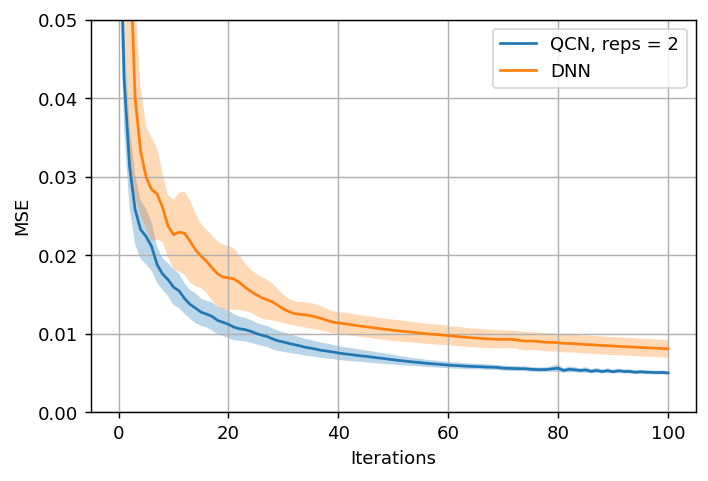

In [16]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QCN, reps = 2", "DNN"])
plt.grid()
plt.ylim([0, 0.05])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit.pdf"), bbox_inches='tight')

## Hybrid

In [21]:
qcn_list = loader(data_path("boston_hybrid"))
dnn_list = loader(data_path("boston_dnn_full"))

In [23]:
loss1 = np.array([qcn.loss for qcn in qcn_list])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([dnn.loss for dnn in dnn_list])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

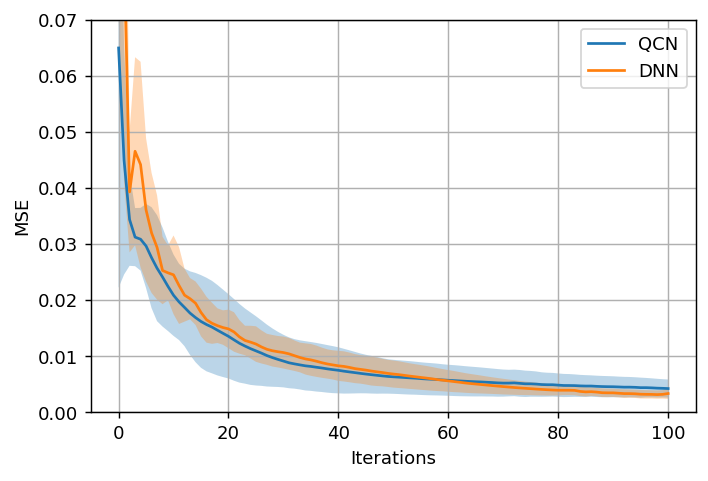

In [26]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.ylim([0, 0.07])
plt.legend(["QCN", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("2D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [27]:
print(avg1[-1], avg2[-1])

0.0042065205272310705 0.003318873724001376
